<h1><center><font size="6">Predicting Financial Distress </font></center></h1>

<h2><center><font size="4">Dataset used:Kaggle </font></center></h2>

<h3><center><font size="4"> https://www.kaggle.com/c/GiveMeSomeCredit/data </font></center></h2>

<a id="top"></a> <br>
## Table of  Contents
1. [Introduction](#1)

1. [Initialization](#2)
    1. [Load packages](#21)
    1. [Define Metadata](#22)
    
1. [Load Data](#3)

1. [Data Insights](#4)
    1. [Data Structure](#41)
    1. [Summary Stats](#42)
    1. [Unique Value Checking](#43)
    1. [Identifying 'Bad Columns'](#44)

1. [Data Cleansing](#5)
    1. [Data Reduction](#51)
        1. [Dropping Bad Columns](#511)
        1. [Null Value Removal](#512)
    1. [Data Type Conversion](#52)

1. [Modelling Workflow](#6)
    1. [Data Prep](#61)
        1. [Categorical to Ordinal Encoding](#611)
        1. [Normalizing Numerical Variables](#612)
        1. [Feature Target Split](#613)
        1. [Train-Test Split](#614)
    1. [Estimate of Baseline Accuracy - Class Distributions](#62)
    1. [Predictive Modelling](#63)
        1. [ML Model Fitting](#631)
        1. [Model Performance Metrics Report](#632)
    1. [Performance Metrics for Imbalanced Datasets](#64)
    
1. [References](#7)

# <a id='1'>Introduction</a>  

Assume you work for a bank and because of the recent recession they have decided to overhaul their credit scoring algorithm

" Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. This competition requires participants to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years."


## <a id='2'>Initialization</a>  


### <a id='21'>Load Packages</a>  

Load the minimum number of packages to get started and add more as we go along

In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
# This is to suppress any deprecation warnings 

import os

import sys
sys.path.append("/home/paperspace/Kaggle Grandmaster/Udemy Superstar/Classification") # Adds higher directory to python modules path.


### <a id='22'>Define Metadata</a>  

In [2]:
# Define the name of the target class column here instead of manually typing it out everywhere
target_class_name = 'SeriousDlqin2yrs'

# Fill in the names of what you want to call the 0 and 1 class
labels = ['No Distress', 'Distress']

input_file_name = 'cs-training.csv'

intermediate_data_path = '../intermediate data/'
 
cleaned_dataframe_name = 'week1_cleaned_df_output_' 

# Enter the date in which this notebook is run
export_date = '20200511'


In [3]:
# Check ou tthe names of the files in the input folder that we need to load as dataframe
import os
print(os.listdir('../input'))
# This will list all the files in this folder

['Readme.txt', '.ipynb_checkpoints', 'cs-training.csv', 'cs-test.csv', 'Data%20Dictionary.xls', 'Data Dictionary.txt', 'sampleEntry.csv']


## <a id='3'>Load Data</a>  

In [4]:
df = pd.read_csv('../input/' + input_file_name)

# drop the first column
del df['Unnamed: 0']

# place the SeriousDlqin2yrs as the last column because its the target variable
df = (pd.concat([df[df.columns[1:]],df[df.columns[0]]], axis=1))

df.sample(5)

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
138722,0.000000,84,0,0.079168,2500.0,4,0,1,0,0.0,0
84513,0.044461,37,0,1978.000000,NaN,3,0,1,0,0.0,0
14421,0.045099,78,0,0.076264,3500.0,8,0,1,0,0.0,0
107876,0.950203,41,0,1.015410,2400.0,4,0,2,0,3.0,0
119422,0.434255,57,0,0.403372,3083.0,5,0,0,2,0.0,0


Lets check the head & tail to make sure there is nothing going on

In [5]:
df.head(3)

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,1
1,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,0
2,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,0


In [6]:
df.tail(3)

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
149997,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0,0
149998,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0,0
149999,0.850283,64,0,0.249908,8158.0,8,0,2,0,0.0,0


No trouble with loading the data. Both the head and tail are clean

## <a id=4 > Data Insights

### <a id='41'>Data Structure</a> 

In [7]:
# Lets see the data structure
df.info()
# This will give you how many rows & columns are there

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
SeriousDlqin2yrs                        150000 non-null int64
dtypes: float64(4), int64(7)
memory usage: 12.6 MB


There are only 2 columns that have the null values. all the columns seem to be correctly encoded as numbers

### <a id='42'>Summary Stats</a> 

In [8]:
df.describe()
# check out each column's summary statistics to and infer and have follow on visualizations 
# Note that only the numerical columns will be described. Make sure to ignore non-numerical columns
# like 'customer_id' before you describe
# Also you will want to exclude the integer columns

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
count,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000,150000.000000
mean,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222,0.066840
std,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086,0.249746
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000,0.000000
max,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000,1.000000


### <a id='43'>Unique Value Checking</a> 

In [9]:
for column in df.columns:
    print(column, len(df[column].unique()))

RevolvingUtilizationOfUnsecuredLines 125728
age 86
NumberOfTime30-59DaysPastDueNotWorse 16
DebtRatio 114194
MonthlyIncome 13595
NumberOfOpenCreditLinesAndLoans 58
NumberOfTimes90DaysLate 19
NumberRealEstateLoansOrLines 28
NumberOfTime60-89DaysPastDueNotWorse 13
NumberOfDependents 14
SeriousDlqin2yrs 2


### <a id='44'>Identifying Bad Columns</a> 

In [10]:
from helper_functions_comprehensive import find_bad_columns_function

null_col_list, blank_space_col_list, constant_numeric_col_list, \
constant_non_numeric_col_list, duplicate_col_list = find_bad_columns_function(df)

Identified 2 features with atleast one null
Identified 0 features with atleast one blank space
Identified 0 numeric features that have quasi-constant values
Identified 0 non-numeric features that have quasi-constant values
Identified 0 features that are duplicates of other features


We are already knew that there were 2 features with no nulls

## <a id='5'>Data Cleansing</a> 

#### <a id='511'>Dropping Bad Columns</a> 

In [11]:
# In this dataset, we dont have any duplicated columns or those which have near-constant values
# But if they do show up, you should go ahead and delete them to reduce overfitting

print('Before dropping irrelevant features and duplicated columns,')
print('{} number of columns were present'.format(len(df.columns)))

for drop_column_list in [constant_numeric_col_list, constant_non_numeric_col_list, duplicate_col_list]:
    df.drop(drop_column_list, axis=1, inplace=True)

print('After dropping the above, ')
print('{} number of columns are present'.format(len(df.columns)))

# No need to change this code because we are always going to drop these 3 types of columns

Before dropping irrelevant features and duplicated columns,
11 number of columns were present
After dropping the above, 
11 number of columns are present


In [12]:
df.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,1
1,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,0
2,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,0
3,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,0
4,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,0


#### <a id='512'>Null Value Removal</a> 

In [17]:
# df.drop(null_col_list, axis=1, inplace=True)
df.dropna(axis=0, inplace=True)

In [18]:
len(df)
# As seen the number of rows are around 120k as opposed to 150k

120269

In [21]:
import pickle
pickle.dump(df, open(intermediate_data_path+cleaned_dataframe_name + export_date + '.pkl', 'wb'))

## <a id = 6 > Modelling Workflow

### <a id = 61 > Data Prep 

#### <a id = 612 > Normalizing numerical variables

Now that we have numerical features, can we feed it directly into a tree based model like Random Forest? Ye,s even without scaling or normalizing. Scaling has the effect of squeezing all data range into a tight range but is not required for Tree-based ML models

#### <a id='613'>Feature - Target Split</a> 

In [22]:
X = df.drop(target_class_name, axis=1)
y = df[target_class_name]

#### <a id='614'>Train-Test Split</a> 

In [23]:
# split into train and test set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Note optionally convert the pandas dataframe into a numpy array using to_numpy if you have a big data
# and want to model faster. Otherwise it doesnt matter which data structure you use

### <a id='62'>Estimate of baseline accuracy - Class Distributions </a> 

In [24]:
# Figure out the class distribution percentage and round it to 3 decimal places

print('Percentage of Negative class is {} %'.format(
    round(df[target_class_name].value_counts()[0]/len(df) * 100,3)))

print('Percentage of Positive class is {} %'.format(
    round(df[target_class_name].value_counts()[1]/len(df) * 100,3)))

# A dumb model that predicts everything as being 0, will generate a baseline accuracy of 99.8%

Percentage of Negative class is 93.051 %
Percentage of Positive class is 6.949 %


0    111912
1      8357
Name: SeriousDlqin2yrs, dtype: int64

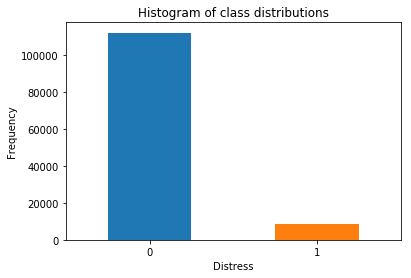

In [25]:
plt.figure(figsize=(6,4))
pd.value_counts(df[target_class_name]).plot.bar()
plt.title('Histogram of class distributions')
plt.xlabel(labels[1])
plt.xticks(rotation=0)
plt.ylabel('Frequency')
df[target_class_name].value_counts()

The baseline accuracy to beat is 73%

What about the other metrics like Precision, Recall and F1 score?
They would all be 0% for the positive class

### <a id='63'>Predictive Modelling</a> 

#### <a id='631'>ML Model Fitting</a> 

In [26]:
from sklearn.ensemble import RandomForestClassifier

# Initialize a classifier object with default params
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

#### <a id='632'>Model Performance Metrics</a> 

Has a Train accuracy of 100.0 % 
              precision    recall  f1-score   support

 No Distress       1.00      1.00      1.00     89529
    Distress       1.00      1.00      1.00      6686

    accuracy                           1.00     96215
   macro avg       1.00      1.00      1.00     96215
weighted avg       1.00      1.00      1.00     96215

The ROC AUC Score on Train set is 1.0
Confusion matrix, without normalization
[[89529     0]
 [    7  6679]]


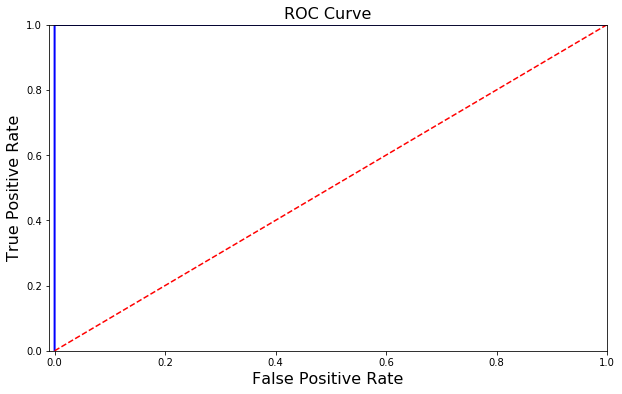

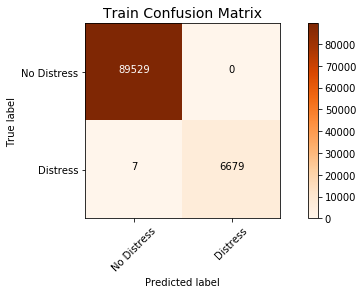

In [27]:
from helper_functions_comprehensive import custom_classification_metrics_function
custom_classification_metrics_function(X_train, y_train, labels, classifier, data_type='Train')

Has a Test accuracy of 93.0 % 
              precision    recall  f1-score   support

 No Distress       0.94      0.99      0.96     22383
    Distress       0.54      0.18      0.28      1671

    accuracy                           0.93     24054
   macro avg       0.74      0.59      0.62     24054
weighted avg       0.91      0.93      0.92     24054

The ROC AUC Score on Test set is 0.83
Confusion matrix, without normalization
[[22124   259]
 [ 1362   309]]


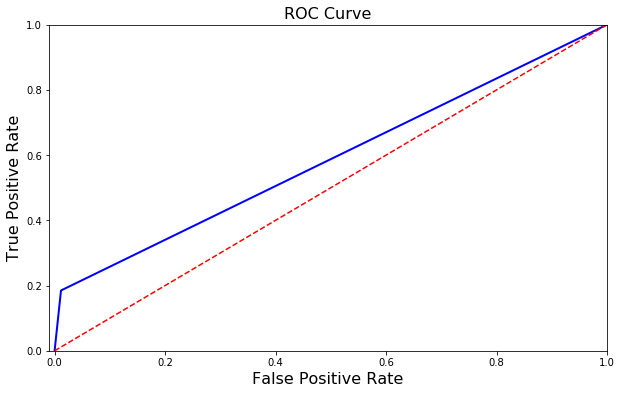

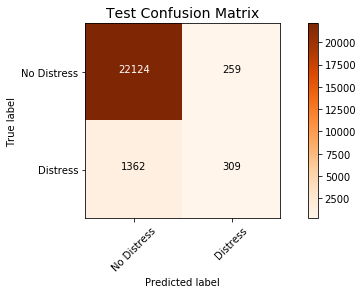

In [28]:
from helper_functions_comprehensive import custom_classification_metrics_function

custom_classification_metrics_function(X_test, y_test, labels, classifier, data_type='Test')

F1 score is terrible most likely because the model is not learning the minority class

The idea here is to come up with a metric that will allow us to compare performance across different models.
This article describes why ROC AUC and F1 score are not the right metrics for imbalanced datasets
https://towardsdatascience.com/selecting-the-right-metric-for-skewed-classification-problems-6e0a4a6167a7

The F1 score is sensitive to imbalance but its unable to differentiate between a good recall or a good precision
due to the symmetrical nature of the formula 
F1 = 2*(Precision * Recall)/(Precision + Recall)

In [30]:
from helper_functions_comprehensive import precision_at_recall_threshold_function

predicted_proba = classifier.predict_proba(X_test)[:,1]
precision_at_recall_threshold_function(y_test, predicted_proba, recall_threshold=0.85)


0.1280589421980528

The really low score begs the question on whether this dataset has sufficiently separable signal

### <a id =64 > Visualize Class Separation

Lets reduce the dimensions to 2D and visualize the class separation. Code adapted from Kaggle
https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets

In [31]:
%%time

# T-SNE Implementation
from sklearn.manifold import TSNE
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

from sklearn.decomposition import PCA, TruncatedSVD
# PCA Implementation
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)

# TruncatedSVD
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', 
                             random_state=42).fit_transform(X.values)

CPU times: user 1h 8min 8s, sys: 3min 43s, total: 1h 11min 52s
Wall time: 10min 44s


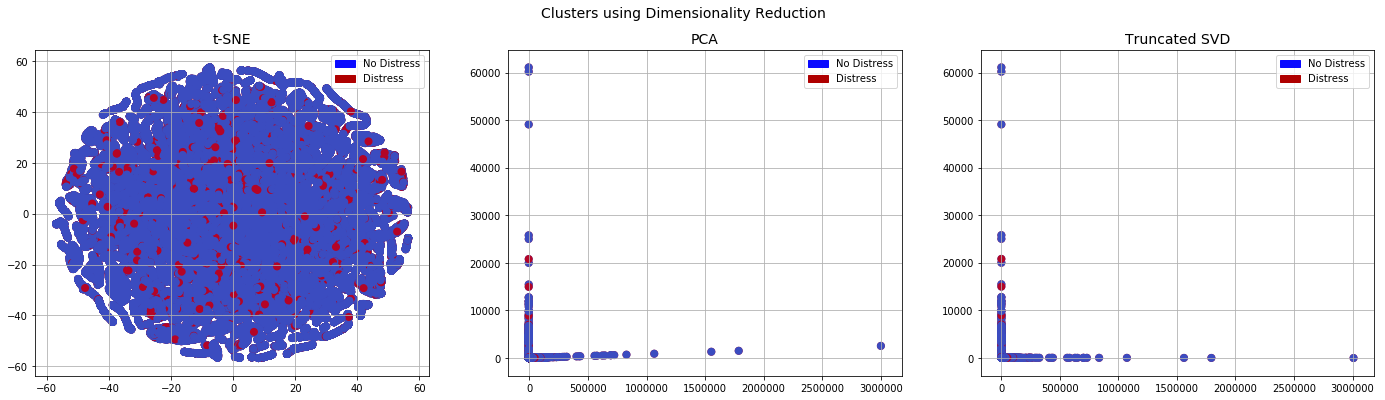

In [32]:
import matplotlib.patches as mpatches

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label=labels[0])
red_patch = mpatches.Patch(color='#AF0000', label=labels[1])


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], 
            c=(y == 0), cmap='coolwarm', label=labels[0], linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], 
            c=(y == 1), cmap='coolwarm', label=labels[1], linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])

# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], 
            c=(y == 0), cmap='coolwarm', label=labels[0], linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], 
            c=(y == 1), cmap='coolwarm', label=labels[1], linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], 
            c=(y == 0), cmap='coolwarm', label=labels[0], linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], 
            c=(y == 1), cmap='coolwarm', label=labels[1], linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

Seems that the positive class (denoted by red) is embedded deep into the negative class space. No wonder our go-to classifier, RandomForest, struggled to give a good result!

In [ ]:
# In Day 2 we are going to try and improve model performance by cleaning the features after upsampling

## <a id =7 > References

https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets
    Code for PCA taken from above